In [3]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
#Importing packages needed for the model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [4]:
try:
    df1 = pd.read_csv('./Training_Data/sclerochronology_training_1.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [5]:
try:
    df2 = pd.read_csv('./Training_Data/sclerochronology_training_2.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [6]:
try:
    df3 = pd.read_csv('./Training_Data/sclerochronology_training_3.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [7]:
try:
    df4 = pd.read_csv('./Training_Data/sclerochronology_training_4.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [8]:
try:
    df5 = pd.read_csv('./Training_Data/sclerochronology_training_5.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [9]:
try:
    df6 = pd.read_csv('./Training_Data/sclerochronology_training_6.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [10]:
try:
    df7 = pd.read_csv('./Training_Data/sclerochronology_training_7.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [11]:
try:
    df8 = pd.read_csv('./Training_Data/sclerochronology_training_8.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [12]:
try:
    df9 = pd.read_csv('./Training_Data/sclerochronology_training_9.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [13]:
df1.shape


(1357, 2)

<AxesSubplot:xlabel='year'>

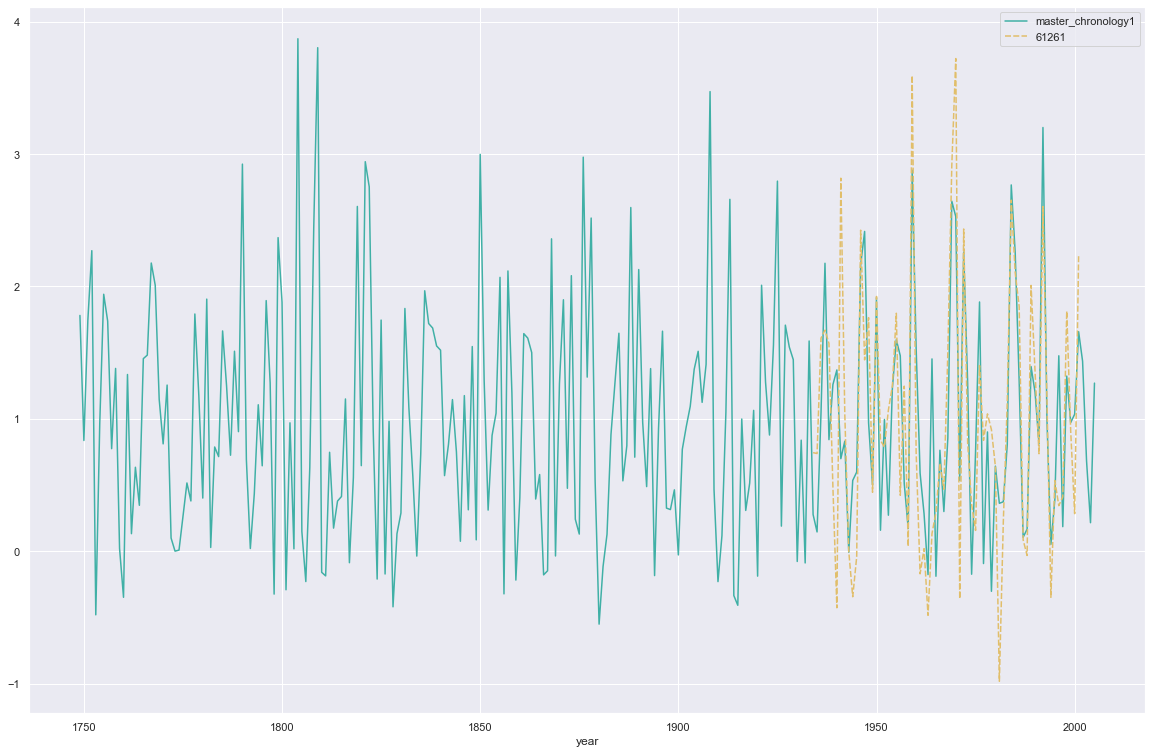

In [51]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df1.iloc[1100:], palette=["#40B0A6","#E1BE6A"])

In [14]:
samples = []
i= 0
for col in df1.columns:
    col_list = df1[col].to_numpy()
    new_array =  col_list[~np.isnan(col_list)]
    samples.append(new_array)
    
final = np.array(np.concatenate((samples[0], samples[1])))
master, sample = df1.apply(pd.Series.first_valid_index)
print(master,sample)
lag = sample-master
print(sample-master)
print(final)
print(samples)

649 1934
1285
[1.93683848 1.60532843 1.07911809 ... 0.90786504 0.28318809 2.23349143]
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 7.44327798e-01,  7.37504805e-01,  1.60965553e+00,  1.66953025e+00,
        1.56974176e+00,  4.82696117e-01, -4.27576371e-01,  2.81750990e+00,
        1.03618331e+00, -1.70256000e-03, -3.44540324e-01, -4.37476170e-02,
        2.42476169e+00,  1.44517469e+00,  1.76406281e+00,  4.44797590e-01,
        1.92406581e+00,  8.36841275e-01,  7.86592804e-01,  1.06658618e+00,
        1.24623111e+00,  1.79729162e+00,  4.22133239e-01,  1.24646098e+00,
        3.62915340e-02,  3.59273582e+00,  7.48367954e-01, -1.71271600e-01,
        1.88079190e-02, -4.84650095e-01,  1.32784371e-01,  2.93359482e-01,
        6.64135965e-01,  4.67983898e-01,  1.50229497e+00,  2.91481105e+00,
        3.72137321e+00, -3.59749710e-01,  2.43384121e+00,  8.17690990e-01,
        3.53033004e-01,  1.56722889e-01,  1.40204180e+00,  8.37033034e

# New 10 length segment mlp

In [565]:
samples = []
i= 0
for col in df1.columns:
    col_list = df1[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples.append(cleanedList)
segments = {}
size = 10
step = 1
length = len(samples)
for j in range(length):
    segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != 10:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == 10
assert len(segments[1][-1]) == 10
print(len(segments[1]))

#Concatenate all of the values of the dictionaries into one list
#Work out where the correlations are
#Put this into binary classification model

59


In [566]:
def segment_pairs_and_classification(dataframe, size):
    i= 0
    samples = []
    for col in dataframe.columns:
        col_list = dataframe[col].tolist()
        cleanedList = [x for x in col_list if x == x]
        samples.append(cleanedList)
    segments = {}
    step = 1
    length = len(samples)
    for j in range(length):
        segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
        j+=1
    #print(segments[0])
    #print(segments[1])

    short = []

    for i in range(len(segments)):
        for j in range(len(segments[i])):
            if len(segments[i][j]) != 10:
                #print(segments[i][j])
                short.append(segments[i][j])
                j+=1
            else:
                continue
        i+=1

    #print(short)
    segments0 = [x for x in segments[0] if x not in short]
    segments1 = [x for x in segments[1] if x not in short]

    #print(segments0)

    segments[0] = segments0
    segments[1] = segments1
    segments[0][-1]
    assert len(segments[0][-1]) == 10
    assert len(segments[1][-1]) == 10
    #print(len(segments[1]))
    segments0 = segments[0]
    segments1 = segments[1]
    pairs =  [(x + y) for x in segments0 for y in segments1]
    indicies = np.where(dataframe.iloc[:,1] == samples[1][0])[0][0]
    classification = [0 for x in range((indicies-1)*len(segments[1]))]
    classification.append(1)
    for j in range(len(segments[1])-1):
        classification.append(0)
        j+=1
    for i in range(len(pairs)-indicies*len(segments[1])):
        if i % len(segments[1]) == 0:
            classification.append(1)
            i+=1
        else:
            classification.append(0)
            i+=1
    return pairs, classification
    

In [567]:
samples_test = []
testing_pairs, testing_class = segment_pairs_and_classification(df6, 10)
assert pairs6 == testing_pairs
assert classification6 == testing_class

In [568]:
segments0 = segments[0]
segments1 = segments[1]
pairs =  [(x + y) for x in segments0 for y in segments1]
pairs[0]
print(len(pairs))
print(len(pairs)*20)
#small_sample_concatenated = np.array(np.concatenate(([pairs[i] for i in range(len(pairs))])))
#print(small_sample_concatenated)
len(final)


79532
1590640


1425

In [569]:
indicies = np.where(df1.iloc[:,1] == samples[1][0])
print(indicies)

(array([1285]),)


In [570]:
classification = [0 for x in range((1285-1)*59)]
classification.append(1)
for j in range(59):
    classification.append(0)
    j+=1
for i in range(len(pairs)-1285*59-1):
    if i % 60 == 0:
        classification.append(1)
        i+=1
    else:
        classification.append(0)
        i+=1
print(len(classification))
print(classification)

79532
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [571]:
samples2 = []
i= 0
for col in df2.columns:
    col_list = df2[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples2.append(cleanedList)
segments = {}
size = 10
step = 1
length = len(samples2)
for j in range(length):
    segments[j] = ([samples2[j][i : i + size] for i in range(0, len(samples2[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != 10:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == 10
assert len(segments[1][-1]) == 10
print(len(segments[1]))


54


In [572]:
segments0 = segments[0]
segments1 = segments[1]
pairs2 =  [(x + y) for x in segments0 for y in segments1]
pairs2[0]
print(len(pairs2))
#small_sample_concatenated = np.array(np.concatenate(([pairs[i] for i in range(len(pairs))])))
#print(small_sample_concatenated)
len(final)


72792


1425

In [573]:
indicies = np.where(df2.iloc[:, 1] == samples2[1][0])
print(indicies)

(array([1291]),)


In [574]:
classification2 = [0 for x in range((1291-1)*54)]
classification2.append(1)
for j in range(54):
    classification2.append(0)
    j+=1
for i in range(len(pairs2)-1291*54-1):
    if i % 55 == 0:
        classification2.append(1)
        i+=1
    else:
        classification2.append(0)
        i+=1
print(len(classification2))
print(classification2)

72792
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [575]:
samples3 = []
i= 0
for col in df3.columns:
    col_list = df3[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples3.append(cleanedList)
segments = {}
size = 10
step = 1
length = len(samples3)
for j in range(length):
    segments[j] = ([samples3[j][i : i + size] for i in range(0, len(samples3[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != 10:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == 10
assert len(segments[1][-1]) == 10
print(len(segments[1]))


111


In [576]:
segments0 = segments[0]
segments1 = segments[1]
pairs3 =  [(x + y) for x in segments0 for y in segments1]
pairs3[0]
print(len(pairs3))
#small_sample_concatenated = np.array(np.concatenate(([pairs[i] for i in range(len(pairs))])))
#print(small_sample_concatenated)



149628


In [577]:
indicies = np.where(df3.iloc[:, 1] == samples3[1][0])
print(indicies)

(array([1234]),)


In [578]:
classification3 = [0 for x in range((1234-1)*111)]
classification3.append(1)
for j in range(111):
    classification3.append(0)
    j+=1
for i in range(len(pairs3)-1234*111-1):
    if i % 112 == 0:
        classification3.append(1)
        i+=1
    else:
        classification3.append(0)
        i+=1
print(len(classification3))
print(classification3)

149628
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [579]:
samples4 = []
i= 0
for col in df4.columns:
    col_list = df4[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples4.append(cleanedList)
segments = {}
size = 10
step = 1
length = len(samples4)
for j in range(length):
    segments[j] = ([samples4[j][i : i + size] for i in range(0, len(samples4[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != 10:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == 10
assert len(segments[1][-1]) == 10
print(len(segments[1]))


43


In [580]:
segments0 = segments[0]
segments1 = segments[1]
pairs4 =  [(x + y) for x in segments0 for y in segments1]
pairs4[0]
print(len(pairs4))
#small_sample_concatenated = np.array(np.concatenate(([pairs[i] for i in range(len(pairs))])))
#print(small_sample_concatenated)



57964


In [581]:
indicies = np.where(df4.iloc[:, 1] == samples4[1][0])
print(indicies)

(array([1304]),)


In [582]:
classification4 = [0 for x in range((1304-1)*43)]
classification4.append(1)
for j in range(43):
    classification4.append(0)
    j+=1
for i in range(len(pairs4)-1304*43-1):
    if i % 44 == 0:
        classification4.append(1)
        i+=1
    else:
        classification4.append(0)
        i+=1
print(len(classification4))
print(classification4)

57964
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [583]:
samples5 = []
i= 0
for col in df5.columns:
    col_list = df5[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples5.append(cleanedList)
segments = {}
size = 10
step = 1
length = len(samples5)
for j in range(length):
    segments[j] = ([samples5[j][i : i + size] for i in range(0, len(samples5[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != 10:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == 10
assert len(segments[1][-1]) == 10
print(len(segments[1]))


36


In [584]:
segments0 = segments[0]
segments1 = segments[1]
pairs5 =  [(x + y) for x in segments0 for y in segments1]
pairs5[0]
print(len(pairs5))
#small_sample_concatenated = np.array(np.concatenate(([pairs[i] for i in range(len(pairs))])))
#print(small_sample_concatenated)



48528


In [585]:
indicies = np.where(df5.iloc[:, 1] == samples5[1][0])[0][0]
print(indicies)

1310


In [586]:
classification5 = [0 for x in range((1310-1)*36)]
classification5.append(1)
for j in range(36):
    classification5.append(0)
    j+=1
for i in range(len(pairs5)-1310*36-1):
    if i % 37 == 0:
        classification5.append(1)
        i+=1
    else:
        classification5.append(0)
        i+=1
print(len(classification5))
print(classification5)

48528
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [587]:
samples6 = []
i= 0
for col in df6.columns:
    col_list = df6[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples6.append(cleanedList)
segments = {}
size = 10
step = 1
length = len(samples6)
for j in range(length):
    segments[j] = ([samples6[j][i : i + size] for i in range(0, len(samples6[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != 10:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == 10
assert len(segments[1][-1]) == 10
print(len(segments[1]))


47


In [588]:
segments0 = segments[0]
segments1 = segments[1]
pairs6 =  [(x + y) for x in segments0 for y in segments1]
pairs6[0]
print(len(pairs6))
#small_sample_concatenated = np.array(np.concatenate(([pairs[i] for i in range(len(pairs))])))
#print(small_sample_concatenated)



63356


In [589]:
indicies = np.where(df6.iloc[:, 1] == samples6[1][0])[0][0]
print(indicies)

1298


In [590]:
classification6 = [0 for x in range((indicies-1)*len(segments[1]))]
classification6.append(1)
for j in range(len(segments[1])-1):
    classification6.append(0)
    j+=1
for i in range(len(pairs6)-indicies*len(segments[1])):
    if i % len(segments[1]) == 0:
        classification6.append(1)
        i+=1
    else:
        classification6.append(0)
        i+=1
print(len(classification6))
print(classification6)

63356
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [591]:
samples7 = []
i= 0
for col in df7.columns:
    col_list = df7[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples7.append(cleanedList)
segments = {}
size = 10
step = 1
length = len(samples7)
for j in range(length):
    segments[j] = ([samples7[j][i : i + size] for i in range(0, len(samples7[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != 10:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == 10
assert len(segments[1][-1]) == 10
print(len(segments[1]))


77


In [592]:
segments0 = segments[0]
segments1 = segments[1]
pairs7 =  [(x + y) for x in segments0 for y in segments1]
pairs7[0]
print(len(pairs7))
#small_sample_concatenated = np.array(np.concatenate(([pairs[i] for i in range(len(pairs))])))
#print(small_sample_concatenated)



103796


In [593]:
indicies = np.where(df7.iloc[:, 1] == samples7[1][0])[0][0]
print(indicies)

1269


In [594]:
classification7 = [0 for x in range((indicies-1)*len(segments[1]))]
classification7.append(1)
for j in range(len(segments[1])-1):
    classification7.append(0)
    j+=1
for i in range(len(pairs7)-indicies*len(segments[1])):
    if i % len(segments[1]) == 0:
        classification7.append(1)
        i+=1
    else:
        classification7.append(0)
        i+=1
print(len(classification7))
print(classification7)

103796
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
def create_training_data(df):
    samples = []
    i= 0
    for col in df.columns:
        col_list = df[col].tolist()
        cleanedList = [x for x in col_list if x == x]
        samples.append(cleanedList)
    segments = {}
    size = 10
    step = 1
    length = len(samples)
    for j in range(length):
        segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
        j+=1
    #print(segments[0])
    #print(segments[1])

    short = []

    for i in range(len(segments)):
        for j in range(len(segments[i])):
            if len(segments[i][j]) != 10:
                #print(segments[i][j])
                short.append(segments[i][j])
                j+=1
            else:
                continue
        i+=1

    #print(short)
    segments0 = [x for x in segments[0] if x not in short]
    segments1 = [x for x in segments[1] if x not in short]

    #print(segments0)

    segments[0] = segments0
    segments[1] = segments1
    segments[0][-1]
    assert len(segments[0][-1]) == 10
    assert len(segments[1][-1]) == 10
    print(len(segments[1]))
    segments0 = segments[0]
    segments1 = segments[1]
    pairs =  [(x + y) for x in segments0 for y in segments1]
    pairs[0]
    print(len(pairs))
    indicies = np.where(df.iloc[:, 1] == samples[1][0])[0][0]
    print(indicies)
    classification = [0 for x in range((indicies-1)*len(segments[1]))]
    classification.append(1)
    for j in range(len(segments[1])-1):
        classification.append(0)
        j+=1
    for i in range(len(pairs)-indicies*len(segments[1])):
        if i % len(segments[1]) == 0:
            classification.append(1)
            i+=1
        else:
            classification.append(0)
            i+=1
    print(len(classification))
    print(len(pairs))
    #print(classification)
    return pairs, classification


In [16]:
def create_new_training_data(df):
    samples = []
    i= 0
    for col in df.columns:
        col_list = df[col].tolist()
        cleanedList = [x for x in col_list if x == x]
        samples.append(cleanedList)
    segments = {}
    size = 10
    step = 1
    length = len(samples)
    for j in range(length):
        segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
        j+=1
    #print(segments[0])
    #print(segments[1])

    short = []

    for i in range(len(segments)):
        for j in range(len(segments[i])):
            if len(segments[i][j]) != 10:
                #print(segments[i][j])
                short.append(segments[i][j])
                j+=1
            else:
                continue
        i+=1

    #print(short)
    segments0 = [x for x in segments[0] if x not in short]
    segments1 = [x for x in segments[1] if x not in short]

    #print(segments0)

    segments[0] = segments0
    segments[1] = segments1
    segments[0][-1]
    assert len(segments[0][-1]) == 10
    assert len(segments[1][-1]) == 10
    print(len(segments[1]))
    segments0 = segments[0]
    segments1 = segments[1]
    pairs =  [(x + y) for x in segments0 for y in segments1]
    pairs[0]
    #print(len(pairs))
    indicies = np.where(df.iloc[:, 1] == samples[1][0])[0][0]
    print(indicies)
    classification = [0 for x in range((indicies-1)*len(segments[1]))]
    for i in range(0,6):
        classification.append(1)
    for j in range(len(segments[1])-1):
        classification.append(0)
        j+=1
    
    counter = 1
    for i in range(1,(len(pairs)-(indicies*len(segments[1])+5))): 
        
        if i % len(segments[1]) == 0:
            if counter < 4: 
                for j in range(0,counter):
                    classification.pop()
                    j+=1
                for h in range(0,counter+6):
                    classification.append(1)
                    h+=1
                    i+=1
            else:
                for i in range(0,5):
                    classification.pop()
                for i in range(0,10):
                    classification.append(1)
                    i+=1
            counter += 1
        else:
            classification.append(0)
            i+=1
    print(f"Classification length: {len(classification)}")
    print(f"Pairs length: {len(pairs)}")
    #print(classification)
    return pairs, classification


In [17]:
pairs8, new_classification8 = create_new_training_data(df8)
pairs, new_classification = create_new_training_data(df1)
pairs2, new_classification2 = create_new_training_data(df2)
pairs3, new_classification3 = create_new_training_data(df3)
pairs4, new_classification4 = create_new_training_data(df4)
pairs5, new_classification5 = create_new_training_data(df5)
pairs6, new_classification6 = create_new_training_data(df6)
pairs7, new_classification7 = create_new_training_data(df7)

42
1302
Classification length: 56798
Pairs length: 56616
59
1285
Classification length: 79782
Pairs length: 79532
54
1291
Classification length: 73018
Pairs length: 72792
111
1234
Classification length: 150082
Pairs length: 149628
43
1304
Classification length: 58138
Pairs length: 57964
36
1310
Classification length: 48678
Pairs length: 48528
47
1298
Classification length: 63554
Pairs length: 63356
77
1269
Classification length: 104110
Pairs length: 103796


In [18]:
pairs8, classification8 = create_training_data(df8)
pairs, classification = create_training_data(df1)
pairs2, classification2 = create_training_data(df2)
pairs3, classification3 = create_training_data(df3)
pairs4, classification4 = create_training_data(df4)
pairs5, classification5 = create_training_data(df5)
pairs6, classification6 = create_training_data(df6)
pairs7, classification7 = create_training_data(df7)

42
56616
1302
56616
56616
59
79532
1285
79532
79532
54
72792
1291
72792
72792
111
149628
1234
149628
149628
43
57964
1304
57964
57964
36
48528
1310
48528
48528
47
63356
1298
63356
63356
77
103796
1269
103796
103796


In [19]:
def correct_pairs(df):
    pair = []
    col_list = []
    correct = []
    samples = []
    no_repeat_correct = []
    i= 0
    for col in df.columns:
        col_list = df[col].tolist()
        cleanedList = [x for x in col_list if x == x]
        samples.append(cleanedList)
    for i in range(np.where(df.iloc[:,1 ] == samples[1][0])[0][0],(np.where(df.iloc[:,1 ] == samples[1][-1])[0][0]-8)):
        new = df.iloc[i:i+10]
        
        for col in new.columns:
            col_list = new[col].tolist()
            
            pair.append(col_list)
        correct.append(pair[0] + pair[1])
        pair = []
    no_repeat_correct = [i for n, i in enumerate(correct) if i not in correct[:n]]
   
    return no_repeat_correct


In [20]:
correct_pair = correct_pairs(df1)
correct_pair2 = correct_pairs(df2) 
correct_pair3 = correct_pairs(df3) 
correct_pair4 = correct_pairs(df4) 
correct_pair5 = correct_pairs(df5) 
correct_pair6 = correct_pairs(df6) 
correct_pair7 = correct_pairs(df7) 
correct_pair8 = correct_pairs(df8) 
print(correct_pair)

[[0.276655719, 0.145112558, 1.046589149, 2.174904848, 0.842435048, 1.258658818, 1.368880999, 0.69863438, 0.830886393, -0.00820425, 0.744327798, 0.737504805, 1.609655534, 1.669530251, 1.569741757, 0.482696117, -0.427576371, 2.817509901, 1.036183314, -0.00170256], [0.145112558, 1.046589149, 2.174904848, 0.842435048, 1.258658818, 1.368880999, 0.69863438, 0.830886393, -0.00820425, 0.534273942, 0.737504805, 1.609655534, 1.669530251, 1.569741757, 0.482696117, -0.427576371, 2.817509901, 1.036183314, -0.00170256, -0.344540324], [1.046589149, 2.174904848, 0.842435048, 1.258658818, 1.368880999, 0.69863438, 0.830886393, -0.00820425, 0.534273942, 0.597156932, 1.609655534, 1.669530251, 1.569741757, 0.482696117, -0.427576371, 2.817509901, 1.036183314, -0.00170256, -0.344540324, -0.043747617], [2.174904848, 0.842435048, 1.258658818, 1.368880999, 0.69863438, 0.830886393, -0.00820425, 0.534273942, 0.597156932, 2.161667766, 1.669530251, 1.569741757, 0.482696117, -0.427576371, 2.817509901, 1.036183314, -

In [21]:
print(correct_pair)

[[0.276655719, 0.145112558, 1.046589149, 2.174904848, 0.842435048, 1.258658818, 1.368880999, 0.69863438, 0.830886393, -0.00820425, 0.744327798, 0.737504805, 1.609655534, 1.669530251, 1.569741757, 0.482696117, -0.427576371, 2.817509901, 1.036183314, -0.00170256], [0.145112558, 1.046589149, 2.174904848, 0.842435048, 1.258658818, 1.368880999, 0.69863438, 0.830886393, -0.00820425, 0.534273942, 0.737504805, 1.609655534, 1.669530251, 1.569741757, 0.482696117, -0.427576371, 2.817509901, 1.036183314, -0.00170256, -0.344540324], [1.046589149, 2.174904848, 0.842435048, 1.258658818, 1.368880999, 0.69863438, 0.830886393, -0.00820425, 0.534273942, 0.597156932, 1.609655534, 1.669530251, 1.569741757, 0.482696117, -0.427576371, 2.817509901, 1.036183314, -0.00170256, -0.344540324, -0.043747617], [2.174904848, 0.842435048, 1.258658818, 1.368880999, 0.69863438, 0.830886393, -0.00820425, 0.534273942, 0.597156932, 2.161667766, 1.669530251, 1.569741757, 0.482696117, -0.427576371, 2.817509901, 1.036183314, -

In [22]:
def create_binary_class(pairs, correct_pairs):
    binary = []
    for i in range(len(pairs)):
        if pairs[i] in correct_pairs:
            binary.append(1)
        else: 
            binary.append(0)

    return binary     


In [23]:
def create_overlap_binary_class(pairs, correct_pairs):
    binary = []
    found_pairs = []
    i=0
    while i < len(pairs):
        
        if pairs[i] in correct_pairs:
            if correct_pairs.index(pairs[i]) < 5: 
                for j in range(0,correct_pairs.index(pairs[i])): 
                    binary.pop()
                    j+=1
                for h in range(0,correct_pairs.index(pairs[i])):
                    binary.append(1)
                    h+=1
                for f in range(6):
                    binary.append(1)
                i+=6
            else:
                for z in range(0,5):
                    binary.pop()
                for f in range(0,11):
                    binary.append(1)
                i+=6  
        else: 
            binary.append(0)
            i+=1
    return binary     

In [24]:
binary = create_overlap_binary_class(pairs, correct_pair)
binary2 = create_overlap_binary_class(pairs2, correct_pair2)
binary3 = create_overlap_binary_class(pairs3, correct_pair3)
binary4 = create_overlap_binary_class(pairs4, correct_pair4)
binary5 = create_overlap_binary_class(pairs5, correct_pair5)
binary6 = create_overlap_binary_class(pairs6, correct_pair6)
binary7 = create_overlap_binary_class(pairs7, correct_pair7)
binary8 = create_overlap_binary_class(pairs8, correct_pair8)

In [25]:
new = create_overlap_binary_class(pairs, correct_pair)
print(new)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [51]:
def first_training_data(df):
    samples = []
    i= 0
    for col in df.columns:
        col_list = df[col].tolist()
        cleanedList = [x for x in col_list if x == x]
        samples.append(cleanedList)
        
    print(len(samples[1]))
    segments = {}
    size = 100
    step = 50
    length = len(samples)
    
    segments[0] = ([samples[0][i : i + size] for i in range(0, len(samples[0]), step)])

    #print(segments[0])
    #print(segments[1])

    short0 = []

    
    for j in range(len(segments[0])):
        if len(segments[0][j]) != 100:
            #print(segments[i][j])
            short0.append(segments[0][j])
               
        else:
            continue
        
        
    size = 10
    step = 1
    length = len(samples)
    
    segments[1] = ([samples[1][i : i + size] for i in range(0, len(samples[1]), step)])

    #print(segments[0])
    #print(segments[1])

    short1 = []

    for j in range(len(segments[1])):
        if len(segments[1][j]) != 10:
            #print(segments[i][j])
            short1.append(segments[1][j])
               
        else:
            continue
        

    #print(short)
    segments0 = [x for x in segments[0] if x not in short0]
    segments1 = [x for x in segments[1] if x not in short1]
    

    segments[0] = segments0
    segments[1] = segments1
    print(segments[0][-1])
    segments[0][-1]
    assert len(segments[0][-1]) == 100
    assert len(segments[1][-1]) == 10
    print(len(segments[0]))
    print(len(segments[1]))
    segments0 = segments[0]
    segments1 = segments[1]
    pairs =  [(x + y) for x in segments0 for y in segments1]
    #pairs[0]
    m,s = df1.notna().idxmax()
    print(m,s)
    start = s-m 
    output = []
    l = len(samples[0])
    for j in range(len(segments[0])):
        if j*50+100 < start:
            for j in range(len(segments[1])):
                output.append(0)
        elif (j*50)+100 >= start:
            for j in range(len(segments[1])):
                output.append(1)
            
    print(len(pairs))
    print(len(output))
    return pairs, output


In [52]:
m,s = df1.notna()
print(m,s)

master_chronology1 61261


In [53]:
first_match, first_output = first_training_data(df1)
first_match2, first_output2 = first_training_data(df2)
first_match3, first_output3 = first_training_data(df3)
first_match4, first_output4 = first_training_data(df4)
first_match5, first_output5 = first_training_data(df5)
first_match6, first_output6 = first_training_data(df6)
first_match7, first_output7 = first_training_data(df7)
first_match8, first_output8 = first_training_data(df8)

68
[0.463159706, -0.028600042, 0.769152804, 0.94141606, 1.094038005, 1.374255654, 1.509807829, 1.124032923, 1.411399878, 3.471788164, 0.466035711, -0.230093767, 0.116726853, 1.050930805, 2.657789773, -0.335865016, -0.408896173, 0.998348131, 0.307621218, 0.513873186, 1.063506784, -0.188803439, 2.008807641, 1.277266822, 0.877278741, 1.55634799, 2.795451533, 0.189026467, 1.707422686, 1.541408566, 1.446754578, -0.077984759, 0.83843857, -0.089105839, 1.587675423, 0.276655719, 0.145112558, 1.046589149, 2.174904848, 0.842435048, 1.258658818, 1.368880999, 0.69863438, 0.830886393, -0.00820425, 0.534273942, 0.597156932, 2.161667766, 2.415307112, 0.969133699, 0.501145021, 1.914125507, 0.157856264, 0.994870381, 0.27149899, 1.226489039, 1.597437024, 1.475668069, 0.509919073, 0.17176143, 2.878813758, 1.53605392, 0.58913451, 0.282591306, -0.177122377, 1.452272042, -0.189524253, 0.762222409, 0.299306232, 0.855830851, 2.643632999, 2.528113969, 0.534313446, 2.25967243, 1.26976055, -0.174321338, 0.757461

# TRIPLE MLP SHIT (NO IM NOT FUCKING JOKING)

In [55]:
total_first_matches = first_match + first_match2 + first_match3 + first_match4 + first_match5 + first_match6 + first_match7 + first_match8
total_first_ouputs = first_output + first_output2 + first_output3 + first_output4 + first_output5 + first_output6 + first_output7 + first_output8
x = total_first_matches
y = total_first_ouputs

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print('Training Data: ')
print(len(x_train))
print('----------------------------------------------')
print('Testing Data: ')
print(len(x_test))

Training Data: 
8535
----------------------------------------------
Testing Data: 
3659


In [58]:
#Importing packages needed for the model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier()

In [59]:
parameter_space = {
    'hidden_layer_sizes': [(100,), (150,),(200,),(300,)],
    'activation': ['relu'],
    'solver': [ 'adam'],
    'alpha': [ 0.05],
    'learning_rate': ['constant'],
    'max_iter' : [ 100, 500, 1000, 2000],
    'early_stopping' : [False]
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(x_train, y_train) # X is train samples and y is the corresponding labels

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.05],
                         'early_stopping': [False],
                         'hidden_layer_sizes': [(100,), (150,), (200,), (300,)],
                         'learning_rate': ['constant'],
                         'max_iter': [100, 500, 1000, 2000],
                         'solver': ['adam']})

In [60]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

1.000 (+/-0.000) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}
1.000 (+/-0.000) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
1.000 (+/-0.000) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}
1.000 (+/-0.000) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 2000, 'solver': 'adam'}
1.000 (+/-0.000) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}
1.000 (+/-0.000) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (1

In [61]:
y_true, y_pred = y_test , clf.predict(x_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3381
           1       1.00      1.00      1.00       278

    accuracy                           1.00      3659
   macro avg       1.00      1.00      1.00      3659
weighted avg       1.00      1.00      1.00      3659



In [64]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_true, y_pred, average='macro')

(1.0, 1.0, 1.0, None)

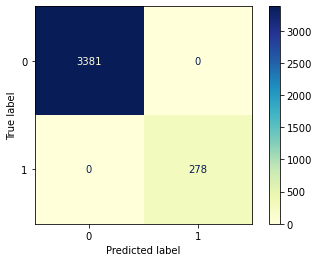

In [65]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1], )
disp.plot(cmap="YlGnBu")

plt.show()

# DOUBLE MLP SHIT

In [167]:
total_pairs = pairs + pairs2 + pairs3 + pairs4 + pairs5 + pairs6 + pairs7 
total_binary = binary + binary2 + binary3 + binary4 + binary5 + binary6 + binary7 
x = total_pairs
y = total_binary

In [168]:
x = pd.Series(total_pairs)
y = pd.Series(total_binary)
print(x)
print(y)

0         [1.936838481, 1.605328427, 1.079118093, 0.4248...
1         [1.936838481, 1.605328427, 1.079118093, 0.4248...
2         [1.936838481, 1.605328427, 1.079118093, 0.4248...
3         [1.936838481, 1.605328427, 1.079118093, 0.4248...
4         [1.936838481, 1.605328427, 1.079118093, 0.4248...
                                ...                        
575591    [1.475974643, 0.185010428, 1.322578743, 0.9713...
575592    [1.475974643, 0.185010428, 1.322578743, 0.9713...
575593    [1.475974643, 0.185010428, 1.322578743, 0.9713...
575594    [1.475974643, 0.185010428, 1.322578743, 0.9713...
575595    [1.475974643, 0.185010428, 1.322578743, 0.9713...
Length: 575596, dtype: object
0         0
1         0
2         0
3         0
4         0
         ..
575591    0
575592    0
575593    0
575594    0
575595    0
Length: 575596, dtype: int64


In [169]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print('Training Data: ')
print(len(x_train))
print('----------------------------------------------')
print('Testing Data: ')
print(len(x_test))


Training Data: 
402917
----------------------------------------------
Testing Data: 
172679


In [170]:
training_set = pd.concat([x_train, y_train], axis=1)
match = training_set[training_set.iloc[:, 1] == 1]
no_match = training_set[training_set.iloc[:, 1] == 0]

In [171]:
from sklearn.utils import resample
undersample = resample(no_match, replace = True, n_samples = len(match))
undersample_train = pd.concat([match, undersample])
print(undersample_train)
undersample_train.iloc[:, 1].value_counts(normalize = True)

                                                        0  1
571389  [0.830886393, -0.00820425, 0.534273942, 0.5971...  1
407895  [0.361474848, 0.372973326, 0.806538715, 2.7666...  1
575125  [1.20175918, 0.810010639, 3.20048871, 1.000006...  1
151996  [1.20175918, 0.810010639, 3.20048871, 1.000006...  1
470365  [0.762222409, 0.299306232, 0.855830851, 2.6436...  1
...                                                   ... ..
426272  [1.042447831, -0.181698597, 0.310895982, 0.556...  0
400695  [1.904099745, 0.028007047, 0.786900407, 0.7142...  0
302027  [1.605328427, 1.079118093, 0.424857487, -0.415...  0
538593  [1.515201333, 0.550296805, 0.350509405, 0.4641...  0
376800  [2.461551479, 1.429599104, 0.14134299, -0.4683...  0

[6392 rows x 2 columns]


1    0.5
0    0.5
Name: 1, dtype: float64

In [172]:
undersample_x_train = np.array(undersample_train.drop(1, axis = 1))
undersample_y_train = undersample_train[1]
#print(undersample_x_train)
print(undersample_y_train)
undersample_x_train_list = []
for i in range(len(undersample_x_train)):
    if len(undersample_x_train[i][0]) == 20:
        undersample_x_train_list.append(undersample_x_train[i][0])
        i+=1
    else:
        #print(undersample_x_train[i])
        print(len(undersample_x_train[i]))
        i+=1
print(len(x_test))
x_test_list =  np.array(x_test,dtype = list);
x_test_final = []
for i in range(len(x_test_list)):

    if len(x_test_list[i]) == 20:
        x_test_final.append(x_test_list[i])
        i+=1
    else:
        #print(undersample_x_train[i])
        #print(len(undersample_x_train[i]))
        i+=1
print(len(undersample_x_train_list))
print(len(undersample_y_train))
print(len(x_test_final))

571389    1
407895    1
575125    1
151996    1
470365    1
         ..
426272    0
400695    0
302027    0
538593    0
376800    0
Name: 1, Length: 6392, dtype: int64
172679
6392
6392
172679


In [57]:
#Importing packages needed for the model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier()

In [174]:
parameter_space = {
    'hidden_layer_sizes': [(100,), (150,),(200,),(300,)],
    'activation': ['relu'],
    'solver': [ 'adam'],
    'alpha': [ 0.05],
    'learning_rate': ['constant'],
    'max_iter' : [ 100, 500, 1000, 2000],
    'early_stopping' : [False]
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(undersample_x_train_list, undersample_y_train) # X is train samples and y is the corresponding labels

/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warning

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.05],
                         'early_stopping': [False],
                         'hidden_layer_sizes': [(100,), (150,), (200,), (300,)],
                         'learning_rate': ['constant'],
                         'max_iter': [100, 500, 1000, 2000],
                         'solver': ['adam']})

In [175]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (300,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}


In [176]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.839 (+/-0.031) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}
0.883 (+/-0.031) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
0.881 (+/-0.026) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}
0.886 (+/-0.017) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 2000, 'solver': 'adam'}
0.860 (+/-0.019) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}
0.889 (+/-0.021) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (1

In [177]:
y_true, y_pred = y_test , clf.predict(x_test_final)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94    171283
           1       0.06      0.91      0.12      1396

    accuracy                           0.89    172679
   macro avg       0.53      0.90      0.53    172679
weighted avg       0.99      0.89      0.94    172679



In [178]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_true, y_pred, average='macro')

(0.5318224321910933, 0.9020026689019682, 0.5315066215544341, None)

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

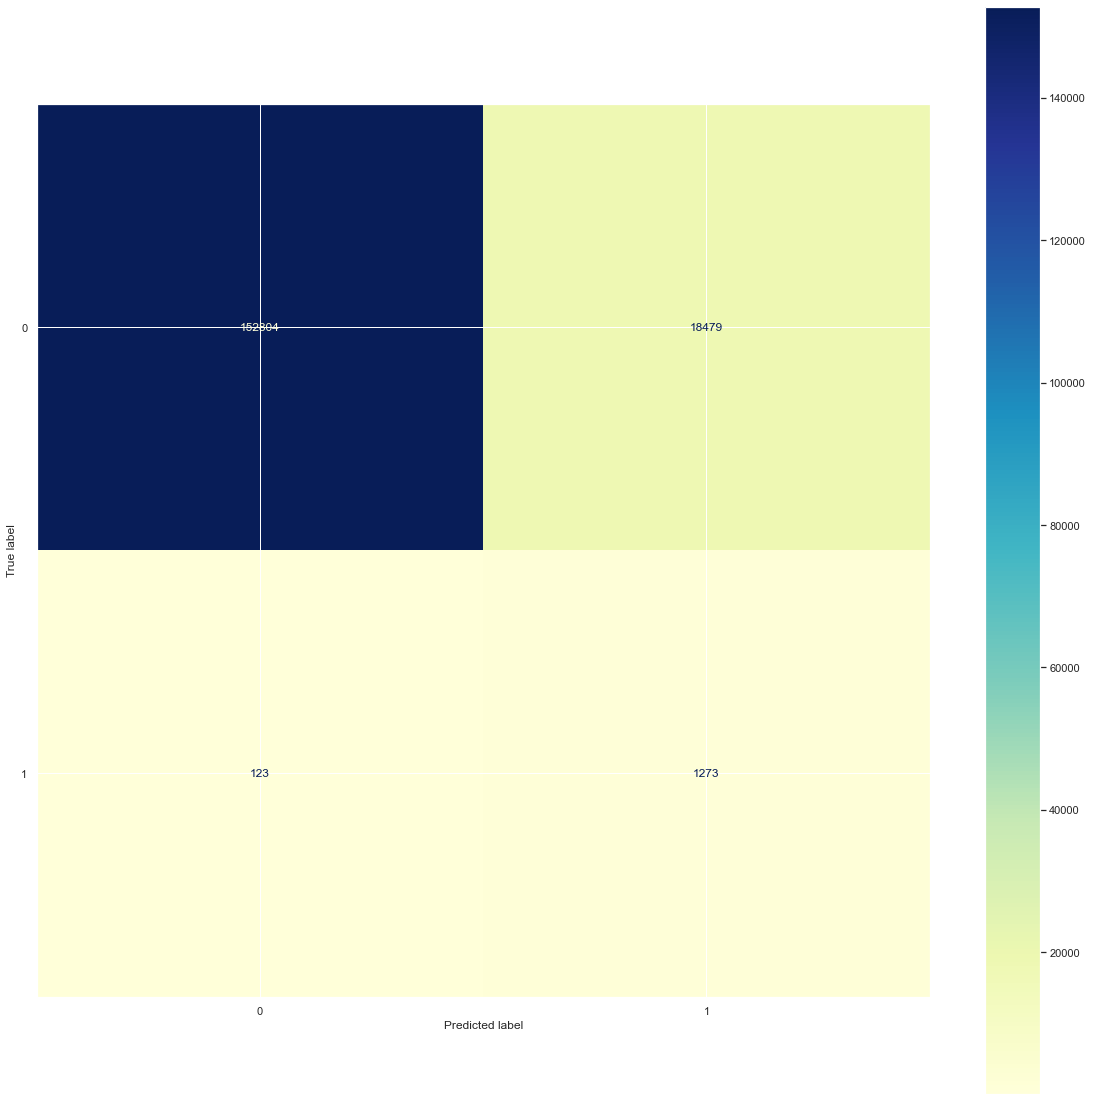

In [180]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1], )
disp.plot(cmap="YlGnBu")

plt.show()

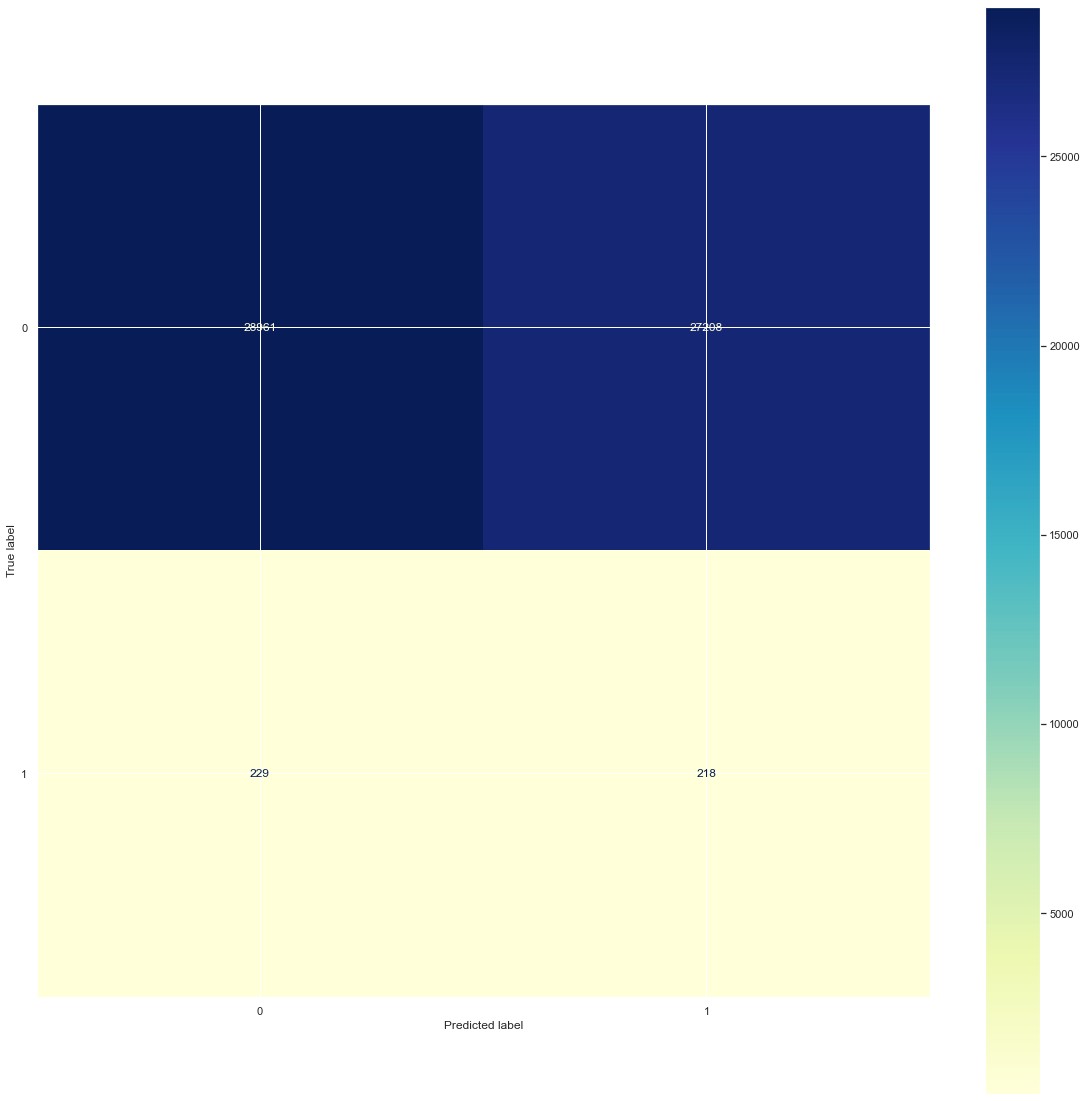

In [206]:
outputs= clf.predict(pairs8)
cm = confusion_matrix(binary8, clf.predict(pairs8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1], )
disp.plot(cmap="YlGnBu")
plt.show()

In [190]:
model_1_output = pd.DataFrame()
model_1_output['Input'] = x_test_final
model_1_output['Output'] = y_pred


In [210]:
model_1_output8 = pd.DataFrame()
model_1_output8['Input'] = pairs8
model_1_output8['Output'] = outputs

In [191]:
true_model_output = model_1_output.loc[model_1_output['Output'] == 1]

In [211]:
true_model_output8 = model_1_output8.loc[model_1_output8['Output'] == 1]

In [192]:
true_model_output.head()

,Input,Output
6,"[0.502159565, 2.030504848, 0.257881563, 0.1802...",1
10,"[0.534273942, 0.597156932, 2.161667766, 2.4153...",1
42,"[0.501145021, 1.914125507, 0.157856264, 0.9948...",1
48,"[0.125439134, 0.312324932, 0.222816666, 2.7447...",1
58,"[0.858004823, -0.137029247, 0.669684423, 1.545...",1


In [214]:
true_model_output8.head()

,Input,Output
1,"[1.936838481, 1.605328427, 1.079118093, 0.4248...",1
6,"[1.936838481, 1.605328427, 1.079118093, 0.4248...",1
11,"[1.936838481, 1.605328427, 1.079118093, 0.4248...",1
14,"[1.936838481, 1.605328427, 1.079118093, 0.4248...",1
17,"[1.936838481, 1.605328427, 1.079118093, 0.4248...",1


In [193]:
inputs = true_model_output['Input'].to_numpy()
print(inputs)

[list([0.502159565, 2.030504848, 0.257881563, 0.180299005, -0.396899456, 1.983165996, 2.287093831, 3.115079501, 0.383217197, 1.088973411, 2.077371192, 0.417491288, 1.066602921, 1.159475782, 1.875791299, 2.766291561, 0.952201573, 0.878987199, -0.120534355, 1.217958502])
 list([0.534273942, 0.597156932, 2.161667766, 2.415307112, 0.969133699, 0.501145021, 1.914125507, 0.157856264, 0.994870381, 0.27149899, 1.140571887, 0.311667813, 3.143450222, 1.058433362, -0.929430038, 1.102651883, 1.330485889, 1.351315392, 1.092639358, 0.901134097])
 list([0.501145021, 1.914125507, 0.157856264, 0.994870381, 0.27149899, 1.226489039, 1.597437024, 1.475668069, 0.509919073, 0.17176143, 1.671313673, 1.369323745, 0.16263536, 0.121772251, -0.032250221, 1.157339329, -0.161287137, -0.070100102, 1.019012064, 2.384889255])
 ...
 list([0.597156932, 2.161667766, 2.415307112, 0.969133699, 0.501145021, 1.914125507, 0.157856264, 0.994870381, 0.27149899, 1.226489039, -0.635267804, 0.949005519, 1.189124931, 0.318767216, 

In [215]:
inputs8 = true_model_output8['Input'].to_numpy().tolist()
print(inputs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [194]:
inputs = inputs.tolist()

In [195]:
def create_binary_class(pairs, correct_pairs):
    binary = []
    for i in range(len(pairs)):
        if pairs[i] in correct_pairs:
            binary.append(1)
        else: 
            binary.append(0)

    return binary     

In [196]:
correct = create_binary_class(inputs, correct_pair)
from collections import Counter
Counter(correct)

Counter({0: 19735, 1: 17})

In [216]:
correct8 = create_binary_class(inputs8, correct_pair8)
from collections import Counter
Counter(correct8)

Counter({0: 27399, 1: 27})

In [218]:
x = pd.Series(inputs)
y = pd.Series(correct)
print(x)
print(y)

0        [0.502159565, 2.030504848, 0.257881563, 0.1802...
1        [0.534273942, 0.597156932, 2.161667766, 2.4153...
2        [0.501145021, 1.914125507, 0.157856264, 0.9948...
3        [0.125439134, 0.312324932, 0.222816666, 2.7447...
4        [0.858004823, -0.137029247, 0.669684423, 1.545...
                               ...                        
19747    [1.00000635, 0.051581377, 0.389166981, 1.47597...
19748    [0.377809252, 0.853374916, -0.292627663, 1.674...
19749    [0.597156932, 2.161667766, 2.415307112, 0.9691...
19750    [1.208813936, 3.568955302, 0.597287758, 0.2701...
19751    [0.642253076, 0.361474848, 0.372973326, 0.8065...
Length: 19752, dtype: object
0        0
1        0
2        0
3        0
4        0
        ..
19747    0
19748    0
19749    0
19750    0
19751    0
Length: 19752, dtype: int64


In [219]:
x8 = pd.Series(inputs8)
y8 = pd.Series(correct8)
print(x)
print(y)

0        [0.502159565, 2.030504848, 0.257881563, 0.1802...
1        [0.534273942, 0.597156932, 2.161667766, 2.4153...
2        [0.501145021, 1.914125507, 0.157856264, 0.9948...
3        [0.125439134, 0.312324932, 0.222816666, 2.7447...
4        [0.858004823, -0.137029247, 0.669684423, 1.545...
                               ...                        
19747    [1.00000635, 0.051581377, 0.389166981, 1.47597...
19748    [0.377809252, 0.853374916, -0.292627663, 1.674...
19749    [0.597156932, 2.161667766, 2.415307112, 0.9691...
19750    [1.208813936, 3.568955302, 0.597287758, 0.2701...
19751    [0.642253076, 0.361474848, 0.372973326, 0.8065...
Length: 19752, dtype: object
0        0
1        0
2        0
3        0
4        0
        ..
19747    0
19748    0
19749    0
19750    0
19751    0
Length: 19752, dtype: int64


In [220]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print('Training Data: ')
print(len(x_train))
print('----------------------------------------------')
print('Testing Data: ')
print(len(x_test))


Training Data: 
13826
----------------------------------------------
Testing Data: 
5926


In [221]:
training_set = pd.concat([x_train, y_train], axis=1)
match = training_set[training_set.iloc[:, 1] == 1]
no_match = training_set[training_set.iloc[:, 1] == 0]

In [222]:
from sklearn.utils import resample
undersample = resample(no_match, replace = True, n_samples = len(match))
undersample_train = pd.concat([match, undersample])
print(undersample_train)
undersample_train.iloc[:, 1].value_counts(normalize = True)

                                                       0  1
2215   [0.282591306, -0.177122377, 1.452272042, -0.18...  1
7060   [0.299306232, 0.855830851, 2.643632999, 2.5281...  1
15243  [0.27149899, 1.226489039, 1.597437024, 1.47566...  1
11617  [0.855830851, 2.643632999, 2.528113969, 0.5343...  1
13064  [0.69863438, 0.830886393, -0.00820425, 0.53427...  1
14420  [0.17176143, 2.878813758, 1.53605392, 0.589134...  1
14933  [0.145112558, 1.046589149, 2.174904848, 0.8424...  1
16999  [0.969133699, 0.501145021, 1.914125507, 0.1578...  1
17810  [0.810010639, 3.20048871, 1.00000635, 0.051581...  1
14610  [1.88252025, -0.093678678, 0.900529967, -0.303...  1
7505   [0.372973326, 0.806538715, 2.766661367, 2.2540...  1
14837  [1.452272042, -0.189524253, 0.762222409, 0.299...  1
15709  [0.157856264, 0.994870381, 0.27149899, 1.22648...  1
5004   [0.104664617, 0.166462045, 1.394677935, 1.2017...  1
8231   [-0.010399427, 1.016100347, 0.954750918, 0.694...  0
12316  [1.063506784, -0.188803439, 2.008

1    0.5
0    0.5
Name: 1, dtype: float64

In [223]:
undersample_x_train = np.array(undersample_train.drop(1, axis = 1))
undersample_y_train = undersample_train[1]
#print(undersample_x_train)
print(undersample_y_train)
undersample_x_train_list = []
for i in range(len(undersample_x_train)):
    if len(undersample_x_train[i][0]) == 20:
        undersample_x_train_list.append(undersample_x_train[i][0])
        i+=1
    else:
        #print(undersample_x_train[i])
        print(len(undersample_x_train[i]))
        i+=1
print(len(x_test))
x_test_list =  np.array(x_test,dtype = list);
x_test_final = []
for i in range(len(x_test_list)):

    if len(x_test_list[i]) == 20:
        x_test_final.append(x_test_list[i])
        i+=1
    else:
        #print(undersample_x_train[i])
        #print(len(undersample_x_train[i]))
        i+=1
print(len(undersample_x_train_list))
print(len(undersample_y_train))
print(len(x_test_final))

2215     1
7060     1
15243    1
11617    1
13064    1
14420    1
14933    1
16999    1
17810    1
14610    1
7505     1
14837    1
15709    1
5004     1
8231     0
12316    0
1924     0
18116    0
732      0
17159    0
12153    0
10422    0
13297    0
30       0
5481     0
19190    0
17303    0
2525     0
Name: 1, dtype: int64
5926
28
28
5926


In [224]:
mlp = MLPClassifier()

In [225]:
parameter_space = {
    'hidden_layer_sizes': [(100,), (150,),(200,),(300,)],
    'activation': ['relu'],
    'solver': [ 'adam'],
    'alpha': [ 0.05],
    'learning_rate': ['constant'],
    'max_iter' : [ 100, 500, 1000, 2000],
    'early_stopping' : [False]
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(undersample_x_train_list, undersample_y_train) # X is train samples and y is the corresponding label

/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warning

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.05],
                         'early_stopping': [False],
                         'hidden_layer_sizes': [(100,), (150,), (200,), (300,)],
                         'learning_rate': ['constant'],
                         'max_iter': [100, 500, 1000, 2000],
                         'solver': ['adam']})

In [230]:
y_true, y_pred = correct8 , clf.predict(inputs8)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(correct8, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      0.51      0.68     27399
           1       0.00      0.74      0.00        27

    accuracy                           0.51     27426
   macro avg       0.50      0.63      0.34     27426
weighted avg       1.00      0.51      0.68     27426



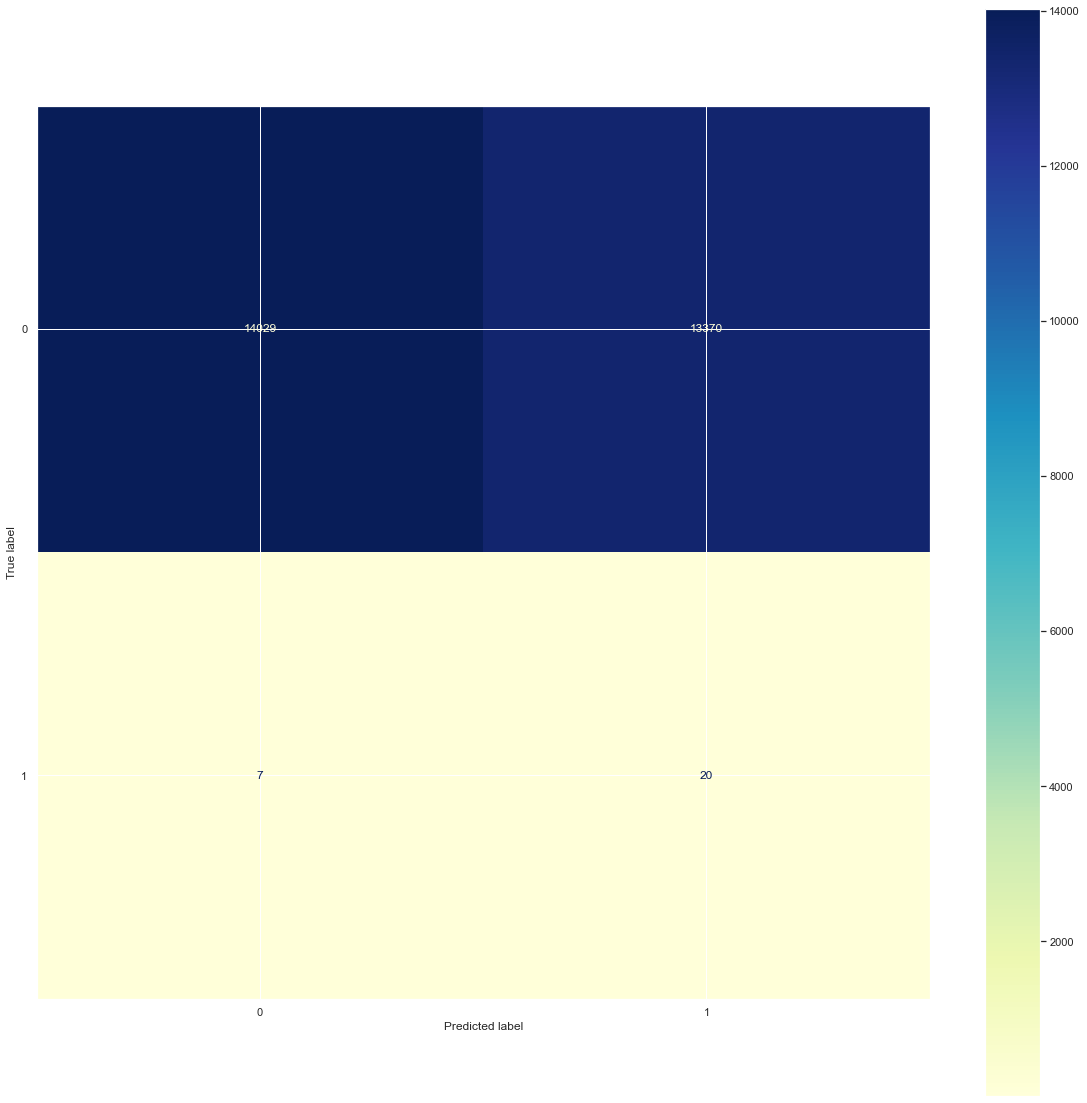

In [231]:
output = clf.predict(inputs8)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1], )
disp.plot(cmap="YlGnBu")

plt.show()

In [233]:
model_2_output8 = pd.DataFrame()
model_2_output8['Input'] = inputs8
model_2_output8['Output'] = output
model_2_output8.head()

,Input,Output
0,"[1.936838481, 1.605328427, 1.079118093, 0.4248...",0
1,"[1.936838481, 1.605328427, 1.079118093, 0.4248...",0
2,"[1.936838481, 1.605328427, 1.079118093, 0.4248...",1
3,"[1.936838481, 1.605328427, 1.079118093, 0.4248...",0
4,"[1.936838481, 1.605328427, 1.079118093, 0.4248...",0


In [143]:
model_2_output = pd.DataFrame()
model_2_output['Input'] = x_test
model_2_output['Output'] = output
model_2_output.head()

,Input,Output
4629,"[0.325316343, 0.314076399, 0.463159706, -0.028...",0
8143,"[0.900529967, -0.303256613, 0.642253076, 0.361...",0
3608,"[1.645731016, -0.351908654, 1.219675576, 0.626...",1
4236,"[1.287979499, 0.310165488, 0.875009062, 1.0418...",1
6363,"[2.161667766, 2.415307112, 0.969133699, 0.5011...",0


In [234]:
true_model2_output8 = model_2_output8.loc[model_2_output8['Output'] == 1]
true_model2_output8.head()

,Input,Output
2,"[1.936838481, 1.605328427, 1.079118093, 0.4248...",1
9,"[1.936838481, 1.605328427, 1.079118093, 0.4248...",1
13,"[1.605328427, 1.079118093, 0.424857487, -0.415...",1
18,"[1.605328427, 1.079118093, 0.424857487, -0.415...",1
23,"[1.605328427, 1.079118093, 0.424857487, -0.415...",1


In [147]:
true_model2_output = model_2_output.loc[model_2_output['Output'] == 1]
true_model2_output.head()

,Input,Output
3608,"[1.645731016, -0.351908654, 1.219675576, 0.626...",1
4236,"[1.287979499, 0.310165488, 0.875009062, 1.0418...",1
6804,"[1.226489039, 1.597437024, 1.475668069, 0.5099...",1
731,"[1.202063091, 1.134644255, 1.265035058, 1.0922...",1
8720,"[0.166462045, 1.394677935, 1.20175918, 0.81001...",1


In [238]:
all_contender8 = true_model2_output8['Input'].to_numpy()
print(len(all_contender8))

13390


In [156]:
all_contender = true_model2_output['Input'].to_numpy()
print(len(all_contender))


1343


In [157]:
samples = []
i= 0
for col in df1.columns:
    col_list = df1[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples.append(cleanedList)
print(samples)
print(len(samples))
print(len(samples[1]))  


[[1.936838481, 1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 1.772309398, 1.556165602, 1.823282499, 1.0222408, 1.292814337, 1.034969212, 0.901032981, 1.13027091, 1.715414673, 0.993393389, 1.850822571, 2.442041392, 0.857572185, 0.700019051, 1.138055918, 1.250789931, -0.097870558, 0.453070437, -0.333305342, 0.504733741, 1.899954477, 0.051051639, 1.78828375, 0.86615834, 0.809999495, -0.178119801, 0.901369303, 0.716136721, 1.536897697, 1.731422168, 2.000601153, 2.620271926, 0.537737633, 0.400781936, 2.190152718, 0.103830399, 0.355241377, 0.983944721, 0.376496977, 1.662446171, 0.952252259, -0.322735529, 0.089002856, 1.467448995, 2.252157677, 1.659527541, 0.490924974, 0.762300621, 1.794865524, 2.537889544, 0.842956782, 2.057922679, -0.344389753, -0.48525862, -0.341097262, 0.274200499, 0.322065686, 3.368399598, -0.049570852, 0.373415028, 3.251336099, 1.365383313, 1.829605354, 2.157757686, -0.139121435, 1.218136579, -0.5443

In [240]:
samples8 = []
i= 0
for col in df8.columns:
    col_list = df8[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples8.append(cleanedList)
print(samples8)
print(len(samples8))
print(len(samples8[1]))  

[[1.936838481, 1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 1.772309398, 1.556165602, 1.823282499, 1.0222408, 1.292814337, 1.034969212, 0.901032981, 1.13027091, 1.715414673, 0.993393389, 1.850822571, 2.442041392, 0.857572185, 0.700019051, 1.138055918, 1.250789931, -0.097870558, 0.453070437, -0.333305342, 0.504733741, 1.899954477, 0.051051639, 1.78828375, 0.86615834, 0.809999495, -0.178119801, 0.901369303, 0.716136721, 1.536897697, 1.731422168, 2.000601153, 2.620271926, 0.537737633, 0.400781936, 2.190152718, 0.103830399, 0.355241377, 0.983944721, 0.376496977, 1.662446171, 0.952252259, -0.322735529, 0.089002856, 1.467448995, 2.252157677, 1.659527541, 0.490924974, 0.762300621, 1.794865524, 2.537889544, 0.842956782, 2.057922679, -0.344389753, -0.48525862, -0.341097262, 0.274200499, 0.322065686, 3.368399598, -0.049570852, 0.373415028, 3.251336099, 1.365383313, 1.829605354, 2.157757686, -0.139121435, 1.218136579, -0.5443

In [246]:

start_year8 = []
print(all_contender8)
for i in range (len(all_contender8.tolist())):
    (master_seg8, sample_seg8) = all_contender8[i][0:9], all_contender8[i][10:20]
    #print(f'{i} : {master_seg8, sample_seg8}')
    start_year8.append(samples8[0].index(master_seg8[0]) - samples8[1].index(sample_seg8[0]))

print(len(start_year8))
Counter(start_year8).most_common(6)


[list([1.936838481, 1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 1.237153945, -0.433130503, 0.304567569, -0.472558446, 1.965059237, 1.099138998, 1.878328707, 3.109796302, 2.587584637, 0.179257109])
 list([1.936838481, 1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 2.61030959, 1.965712577, 1.934216125, -0.053938463, -0.120452023, 1.064293777, 2.729926542, 2.362029508, 1.841823328, 0.710166371])
 list([1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 1.772309398, 0.684413175, 1.854692208, 1.946739808, 0.840538477, 0.541679722, 0.408186869, 3.566220902, 0.735574015, 0.630536811, 1.237153945])
 ...
 list([1.475974643, 0.185010428, 1.322578743, 0.971332156, 1.034463934, 1.657925393, 1.434834976, 0.682094776, 0.214842489, 1.269458772, 2.61030959, 1.965712577, 1.934216125, -0.053938463,

[(1302, 20), (1142, 19), (123, 18), (343, 17), (673, 17), (1030, 17)]

In [166]:

start_year = []
for i in range (len(all_contender)):
    (master_seg, sample_seg) = all_contender[i][0:9], all_contender[i][10:20]
    start_year.append(samples[0].index(master_seg[0]) - samples[1].index(sample_seg[0]))

print(len(start_year))
Counter(start_year).most_common(6)


1343


[(1272, 14), (1286, 13), (1256, 13), (1281, 12), (1299, 12), (1263, 12)]

In [160]:
1285-1272

13

# MLP SHIT

In [478]:
#Need to find a way to submit the whole chronology and sample as single elements
#classification = [0 for x in range(len(comparisons)-5)]
#classification.append(1)
#for i in range(4):
#    classification.append(0)
#    i+=1
#classification2 = []
#classification2 = [0 for x in range(len(comparisons2)-4)]
#classification2.append(1)
#for i in range(3):
#    classification2.append(0)
#    i+=1
#comparisons = np.array(comparisons)
#comparisons2 = np.array(comparisons2)
total_pairs = pairs + pairs2 + pairs3 + pairs4 + pairs5 + pairs6 + pairs7 + pairs8
total_classification = classification + classification2 + classification3 + classification4 + classification5 + classification6 + classification7 + classification8
x = total_pairs
y = total_classification


In [269]:
x = pd.Series(total_pairs)
y = pd.Series(total_classification)
print(x)
print(y)

0         [1.936838481, 1.605328427, 1.079118093, 0.4248...
1         [1.936838481, 1.605328427, 1.079118093, 0.4248...
2         [1.936838481, 1.605328427, 1.079118093, 0.4248...
3         [1.936838481, 1.605328427, 1.079118093, 0.4248...
4         [1.936838481, 1.605328427, 1.079118093, 0.4248...
                                ...                        
632207    [1.475974643, 0.185010428, 1.322578743, 0.9713...
632208    [1.475974643, 0.185010428, 1.322578743, 0.9713...
632209    [1.475974643, 0.185010428, 1.322578743, 0.9713...
632210    [1.475974643, 0.185010428, 1.322578743, 0.9713...
632211    [1.475974643, 0.185010428, 1.322578743, 0.9713...
Length: 632212, dtype: object
0         0
1         0
2         0
3         0
4         0
         ..
632207    0
632208    0
632209    0
632210    0
632211    0
Length: 632212, dtype: int64


In [270]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print('Training Data: ')
print(len(x_train))
print('----------------------------------------------')
print('Testing Data: ')
print(len(x_test))


Training Data: 
442548
----------------------------------------------
Testing Data: 
189664


In [271]:
training_set = pd.concat([x_train, y_train], axis=1)
match = training_set[training_set.iloc[:, 1] == 1]
no_match = training_set[training_set.iloc[:, 1] == 0]

In [272]:
from sklearn.utils import resample
undersample = resample(no_match, replace = True, n_samples = len(match))
undersample_train = pd.concat([match, undersample])
print(undersample_train)
undersample_train.iloc[:, 1].value_counts(normalize = True)

                                                        0  1
570995  [2.174904848, 0.842435048, 1.258658818, 1.3688...  1
359476  [1.282305812, 0.104664617, 0.166462045, 1.3946...  1
569591  [1.063506784, -0.188803439, 2.008807641, 1.277...  1
77135   [1.475668069, 0.509919073, 0.17176143, 2.87881...  1
359696  [0.810010639, 3.20048871, 1.00000635, 0.051581...  1
...                                                   ... ..
208342  [0.696906668, 0.878557637, 1.178861061, -0.336...  0
379823  [1.419923149, 1.229017389, 0.882115948, 1.0512...  0
430946  [0.490712038, -0.322808993, 0.137513985, 1.713...  0
399219  [0.406926463, 0.640336645, 2.551637836, 0.8641...  0
312828  [1.358029693, 0.981736807, 0.202965187, -0.358...  0

[666 rows x 2 columns]


1    0.5
0    0.5
Name: 1, dtype: float64

In [273]:
undersample_x_train = np.array(undersample_train.drop(1, axis = 1))
undersample_y_train = undersample_train[1]
#print(undersample_x_train)
print(undersample_y_train)
undersample_x_train_list = []
for i in range(len(undersample_x_train)):
    if len(undersample_x_train[i][0]) == 20:
        undersample_x_train_list.append(undersample_x_train[i][0])
        i+=1
    else:
        #print(undersample_x_train[i])
        print(len(undersample_x_train[i]))
        i+=1
print(len(x_test))
x_test_list =  np.array(x_test,dtype = list);
x_test_final = []
for i in range(len(x_test_list)):

    if len(x_test_list[i]) == 20:
        x_test_final.append(x_test_list[i])
        i+=1
    else:
        #print(undersample_x_train[i])
        #print(len(undersample_x_train[i]))
        i+=1
print(len(undersample_x_train_list))
print(len(undersample_y_train))
print(len(x_test_final))

570995    1
359476    1
569591    1
77135     1
359696    1
         ..
208342    0
379823    0
430946    0
399219    0
312828    0
Name: 1, Length: 666, dtype: int64
189664
666
666
189664


In [274]:
#Importing packages needed for the model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier()

In [314]:
parameter_space = {
    'hidden_layer_sizes': [(130,), (150,),(200,),(300,)],
    'activation': ['relu'],
    'solver': [ 'adam'],
    'alpha': [ 0.05],
    'learning_rate': ['constant'],
    'max_iter' : [ 10000, 50000, 100000, 250000],
    'early_stopping' : [False]
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(undersample_x_train_list, undersample_y_train) # X is train samples and y is the corresponding labels

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.05],
                         'early_stopping': [False],
                         'hidden_layer_sizes': [(130,), (150,), (200,), (300,)],
                         'learning_rate': ['constant'],
                         'max_iter': [10000, 50000, 100000, 250000],
                         'solver': ['adam']})

In [315]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'max_iter': 100000, 'solver': 'adam'}


In [316]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.883 (+/-0.030) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (130,), 'learning_rate': 'constant', 'max_iter': 10000, 'solver': 'adam'}
0.883 (+/-0.061) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (130,), 'learning_rate': 'constant', 'max_iter': 50000, 'solver': 'adam'}
0.875 (+/-0.049) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (130,), 'learning_rate': 'constant', 'max_iter': 100000, 'solver': 'adam'}
0.890 (+/-0.037) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (130,), 'learning_rate': 'constant', 'max_iter': 250000, 'solver': 'adam'}
0.868 (+/-0.057) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'max_iter': 10000, 'solver': 'adam'}
0.889 (+/-0.043) for {'activation': 'relu', 'alpha': 0.05, 'early_stopping': False, 'hidden_layer_

In [317]:
y_true, y_pred = y_test , clf.predict(x_test_final)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94    189528
           1       0.01      0.93      0.01       136

    accuracy                           0.89    189664
   macro avg       0.50      0.91      0.48    189664
weighted avg       1.00      0.89      0.94    189664



In [318]:
mlp.fit(undersample_x_train_list, undersample_y_train)

/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [319]:
predictions = mlp.predict(x_test_final) 

In [320]:
mlp.score(x_test_final, y_test)

0.8809526320229458

In [321]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predictions, average='macro')

(0.5028203217966417, 0.9147167762888364, 0.47398032677569063, None)

In [322]:
#scores = cross_val_score(mlp, x_test, y_test, cv=6, scoring = 'accuracy')
#mlp.score(x_test, y_test)

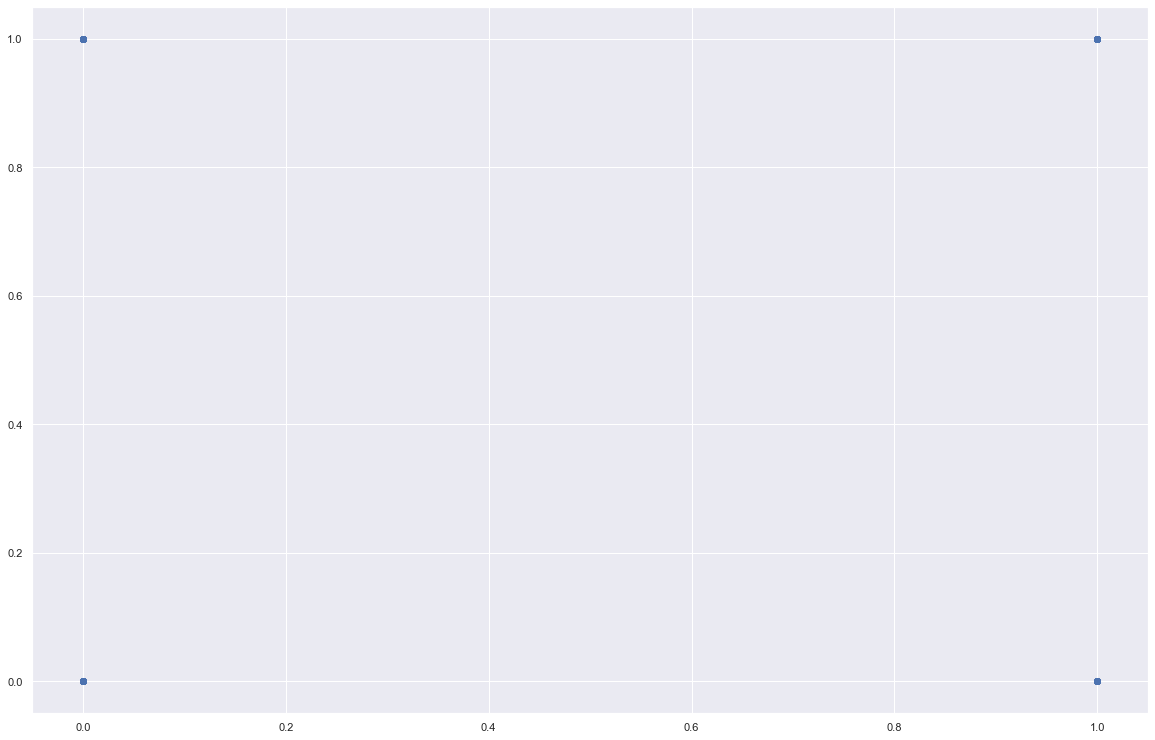

In [323]:
plt.scatter(y_test, predictions)

In [324]:
print(sum(y_test == predictions))

167085


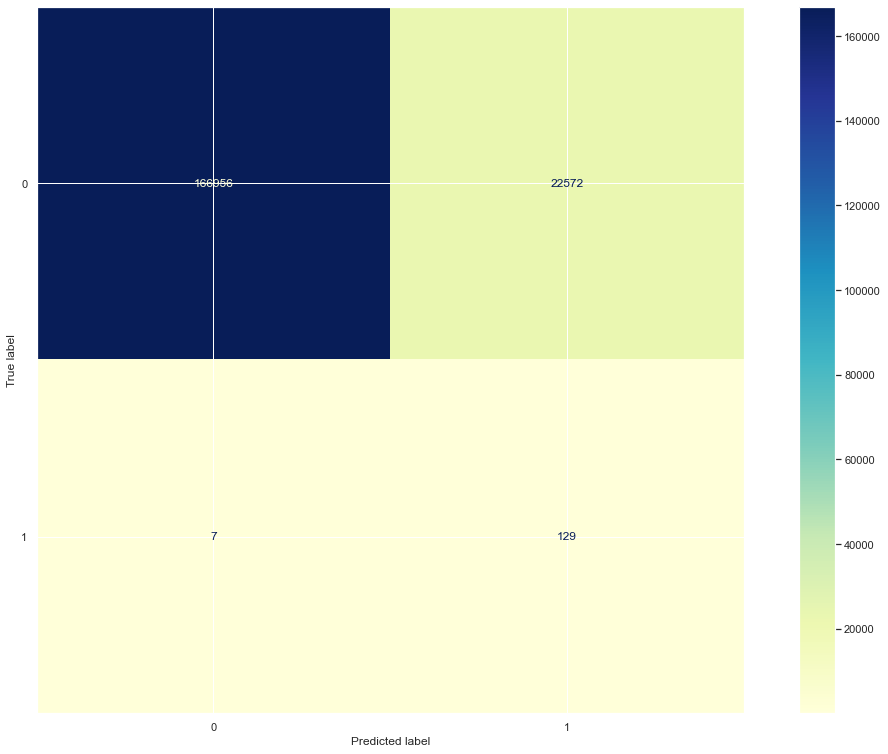

In [325]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp.classes_, )
disp.plot(cmap="YlGnBu")
plt.show()

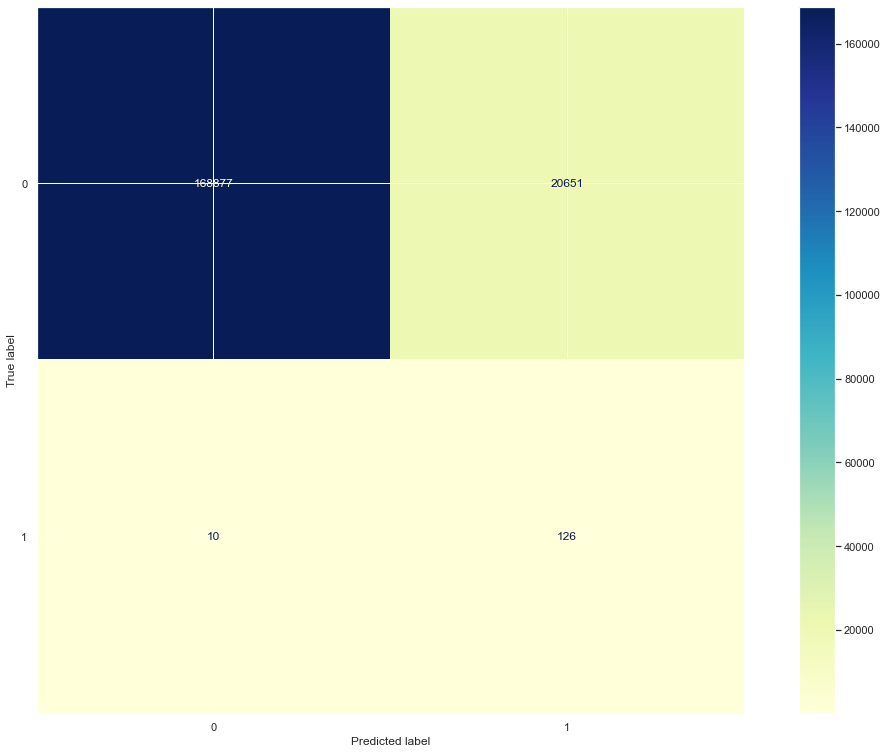

In [326]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp.classes_, )
disp.plot(cmap="YlGnBu")
plt.show()

# Adding lots of segments of the master chronology the size of the sample chronology to the dataframe

In [28]:
for col in df2.columns:
    col_list2 = df2[col].to_numpy()
    new_array2 = col_list2[~np.isnan(col_list2)]
    samples2.append(new_array2)
comparisons2 = []
for i in range(2,len(samples2)-2):
    comparisons2.append((np.array(np.concatenate((samples2[1], samples2[i])))))
    i+=1


In [101]:
samples = []
i = 0

sample_length = df1['61261'].notnull().sum()
for i in range(len(df1)+1-sample_length):
    name = str('master_sample'+ str(i))
    df1[name] = df1.iloc[0+i:sample_length+i, 0]
    i+=1

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_17703/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

In [105]:
samples1 = []
for col in df1.columns:
    col_list1 = df1[col].to_numpy()
    new_array1 = col_list1[~np.isnan(col_list1)]
    samples1.append(new_array1)
comparisons = []
for i in range(2,len(samples1)-2):
    comparisons.append((np.array(np.concatenate((samples1[1], samples1[i])))))
    i+=1
print(comparisons[0])

[ 7.44327798e-01  7.37504805e-01  1.60965553e+00  1.66953025e+00
  1.56974176e+00  4.82696117e-01 -4.27576371e-01  2.81750990e+00
  1.03618331e+00 -1.70256000e-03 -3.44540324e-01 -4.37476170e-02
  2.42476169e+00  1.44517469e+00  1.76406281e+00  4.44797590e-01
  1.92406581e+00  8.36841275e-01  7.86592804e-01  1.06658618e+00
  1.24623111e+00  1.79729162e+00  4.22133239e-01  1.24646098e+00
  3.62915340e-02  3.59273582e+00  7.48367954e-01 -1.71271600e-01
  1.88079190e-02 -4.84650095e-01  1.32784371e-01  2.93359482e-01
  6.64135965e-01  4.67983898e-01  1.50229497e+00  2.91481105e+00
  3.72137321e+00 -3.59749710e-01  2.43384121e+00  8.17690990e-01
  3.53033004e-01  1.56722889e-01  1.40204180e+00  8.37033034e-01
  1.03706469e+00  9.17757378e-01  6.39521532e-01 -9.82318646e-01
  2.22058420e-01  1.13438740e+00  2.65165416e+00  2.10260831e+00
  1.84828988e+00  8.55888100e-02 -3.25841500e-02  2.00752757e+00
  1.36092747e+00  7.36088919e-01  2.60280883e+00  1.16040191e+00
 -3.48868952e-01  5.33399

In [17]:
samples2 = []
i= 0
for col in df2.columns:
    col_list2 = df2[col].to_numpy()
    new_array2 =  col_list2[~np.isnan(col_list2)]
    samples2.append(new_array2)
final2 = np.array(np.concatenate((samples2[0], samples2[1])))
master2, sample2 = df2.apply(pd.Series.first_valid_index)
print(master2,sample2)
lag2 = sample2-master2
print(sample2-master2)
print(final2)
print(samples2)

649 1940
1291
[1.93683848 1.60532843 1.07911809 ... 0.75389583 1.60591463 1.65567729]
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 0.30893636,  1.92461324, -0.10128158,  2.60503637,  1.69930493,
        0.02709865,  1.58987678, -1.04034895,  1.64738557,  0.19361599,
        2.07737119,  0.41749129,  1.06660292,  1.15947578,  1.8757913 ,
        2.76629156,  0.95220157,  0.8789872 , -0.12053435,  1.2179585 ,
        1.13660985,  0.39285607,  0.52876375, -0.08573167,  1.63668155,
       -0.16299186,  0.52801627, -0.00816036,  1.06884308,  3.38442577,
        3.28449957,  0.46309398,  2.24448681,  1.25237426, -0.20486143,
       -0.19144913,  1.10937831,  1.29377011,  0.43839752, -0.2815017 ,
        0.25655683,  0.30403835,  0.74947869,  0.64903207,  2.87075658,
        2.89883972,  1.81719959,  0.79139486, -0.27364955,  0.81981288,
        1.01315917,  1.1372591 ,  3.03595768,  1.34824492, -0.67629895,
        0.27196463,  1.08101

In [18]:
samples2 = []
i = 0

sample_length = df2['61258'].notnull().sum()
for i in range(len(df2)+1-sample_length):
    name = str('master_sample'+ str(i))
    df2[name] = df1.iloc[0+i:sample_length+i, 0]
    i+=1

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

In [19]:
samples3 = []
i= 0
for col in df3.columns:
    col_list3 = df3[col].to_numpy()
    new_array3 =  col_list3[~np.isnan(col_list3)]
    samples3.append(new_array3)
final3 = np.array(np.concatenate((samples3[0], samples3[1])))
master3, sample3 = df3.apply(pd.Series.first_valid_index)
print(master3,sample3)
lag3 = sample3-master3
print(sample3-master3)
print(final3)
print(samples3)

649 1883
1234
[1.93683848 1.60532843 1.07911809 ... 0.21740233 1.80238863 1.25018456]
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 0.53594337,  1.21204073,  1.85074507,  0.54527859,  0.74117546,
        2.17131875,  0.54694384,  2.0592618 ,  1.20552057,  0.6129019 ,
        1.10363151, -0.5671537 ,  0.30293405,  1.31105537,  0.08328097,
        0.04367535,  0.72739822, -0.32376723,  0.71806304,  1.06579763,
        1.16214893,  1.47609143,  2.69583813,  2.5588038 ,  1.81960603,
        3.59875081,  0.11129135, -0.47863305,  0.12607481,  1.10195309,
        1.96963312, -0.64873046, -0.53048672,  1.49906896, -0.37406963,
        0.42375272,  0.52182966, -0.24728452,  1.77543592,  0.78805707,
        0.85021389,  2.56947988,  3.75343031,  0.83712353,  0.8951191 ,
        1.67131367,  1.36932374,  0.16263536,  0.12177225, -0.03225022,
        1.15733933, -0.16128714, -0.0701001 ,  1.01901206,  2.38488926,
        1.59898158,  3.24829

In [20]:
samples4 = []
i= 0
for col in df4.columns:
    col_list4 = df4[col].to_numpy()
    new_array4 =  col_list4[~np.isnan(col_list4)]
    samples4.append(new_array4)
final4 = np.array(np.concatenate((samples4[0], samples4[1])))
master4, sample4 = df4.apply(pd.Series.first_valid_index)
print(master4,sample4)
lag4 = sample4-master4
print(sample4-master4)

print(samples4)

649 1953
1304
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 0.30369199,  0.71363497,  1.91930983,  1.42071431,  0.56746501,
        0.61640617,  0.24302275,  2.62642084,  0.94175396,  1.26650946,
        0.72699651,  1.8471018 , -0.649051  ,  1.50804401,  0.40887684,
        1.46091905,  2.37850139,  2.38402152,  0.02692984,  1.23754116,
        0.7490136 , -0.27193852, -0.05517255,  1.889702  ,  0.15624818,
        0.32296968,  0.26103304,  0.96890584,  1.66767889,  0.47415861,
        1.36085606,  2.45312208,  1.85000237,  2.24480317, -0.52783204,
       -0.55447534,  1.37733567,  1.14057189,  0.31166781,  3.14345022,
        1.05843336, -0.92943004,  1.10265188,  1.33048589,  1.35131539,
        1.09263936,  0.9011341 ,  0.45193424,  3.27510321,  2.22823576,
        0.41789094, -1.19130515])]


In [21]:
samples5 = []
i= 0
for col in df5.columns:
    col_list5 = df5[col].to_numpy()
    new_array5 = col_list5[~np.isnan(col_list5)]
    samples5.append(new_array5)
final5 = np.array(np.concatenate((samples5[0], samples5[1])))
master5, sample5 = df5.apply(pd.Series.first_valid_index)
print(master5,sample5)
lag5 = sample5-master5
print(sample5-master5)
print(final5)
print(samples5)

649 1959
1310
[1.93683848 1.60532843 1.07911809 ... 2.77929156 0.82487058 0.29950547]
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 2.22611689,  0.79248555,  0.72793861,  0.15453373,  0.10131479,
        1.87372453, -0.06328313,  1.66356866, -0.61595021,  1.63568724,
        2.89800102,  1.78298578,  1.10200538,  2.03094914,  1.00935619,
        0.26999265,  0.40697499,  1.27922577,  0.0470617 ,  0.008476  ,
       -0.11886344,  0.56133649,  1.72191734, -0.08610724,  0.80062124,
        2.56881972,  2.87172448,  1.60259376,  0.80038889,  0.1737566 ,
        2.96164092,  0.48694835,  0.84196151,  1.45817928,  0.30809306,
       -1.12951603,  0.17456772,  0.91392301,  0.13129613,  2.39111327,
        1.73527538,  0.59549667,  2.77929156,  0.82487058,  0.29950547])]


In [22]:
samples6 = []
i= 0
for col in df6.columns:
    col_list6 = df6[col].to_numpy()
    new_array6 = col_list6[~np.isnan(col_list6)]
    samples6.append(new_array6)
final6 = np.array(np.concatenate((samples6[0], samples6[1])))
master6, sample6 = df6.apply(pd.Series.first_valid_index)
print(master6,sample6)
lag6 = sample6-master6
print(sample6-master6)
print(final6)
print(samples6)

649 1947
1298
[1.93683848 1.60532843 1.07911809 ... 0.69800733 1.44020284 1.51948246]
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 1.74503295,  0.64955342,  0.47709071,  1.73874582,  0.15283496,
        0.36639882,  0.65238036,  1.35414746,  2.00835223,  1.26684218,
        1.03940701,  0.55363755,  2.39496995,  1.92528626,  0.67562393,
        0.15408127, -0.36848881,  0.72267018, -0.452113  ,  0.78248039,
        0.47155779,  1.60535123,  3.32546431,  2.57215936,  0.26323977,
        1.66852619,  1.40516726, -0.30149448, -0.27032027,  2.19814424,
        0.85946467,  0.32804357, -0.33406602,  0.74483489,  0.36210504,
        0.37636248,  2.5544792 ,  2.33367091,  2.33675617,  1.63733949,
       -0.03420367, -0.63780645,  0.97162567,  0.9364158 ,  0.42499949,
        4.25137971,  1.44475015, -0.38319032,  0.15547344,  0.94675744,
        0.09259192,  1.49517425,  0.7026205 ,  0.69800733,  1.44020284,
        1.51948246])]


In [23]:
samples7 = []
i = 0
for col in df7.columns:
    col_list7 = df7[col].to_numpy()
    new_array7 = col_list7[~np.isnan(col_list7)]
    samples7.append(new_array7)
final7 = np.array(np.concatenate((samples7[0], samples7[1])))
master7, sample7 = df7.apply(pd.Series.first_valid_index)
print(master7, sample7)
lag7 = sample7 - master7
print(sample7 - master7)

print(samples7)

649 1918
1269
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 0.46712658,  0.64460725,  0.31596969,  1.5762631 ,  1.11814108,
        0.62256865,  2.87822433,  3.23933825,  0.25276845,  0.86638222,
        0.67743581,  0.58439824, -0.20866636,  0.64817123, -0.30226299,
        0.75832426,  0.48643164, -0.06817947,  2.99864006,  1.66905071,
        1.86972524,  1.55342935,  0.79601305,  1.64992066,  0.10458588,
       -0.82381202,  0.08225053, -0.53639162,  2.36316149,  3.59626645,
        1.38619968,  0.01210627,  2.13204818, -0.19977379, -0.08950056,
        1.37836703,  1.15953235,  2.29774791,  1.51879756,  0.70090268,
        0.67373256,  2.76968583,  1.39998748,  0.10664236,  0.27464459,
        0.2737048 ,  0.60436621, -0.0793972 ,  0.86419375,  0.6069883 ,
        0.91861366,  1.94650644,  2.54688312,  0.65720303,  2.77171341,
        0.99177797,  0.16332931,  0.28517587,  2.39268242,  0.46043684,
        0.55635564, -0.63526

In [24]:
samples8 = []
i = 0
for col in df8.columns:
    col_list8 = df8[col].to_numpy()
    new_array8 = col_list8[~np.isnan(col_list8)]
    samples8.append(new_array8)
final8 = np.array(np.concatenate((samples8[0], samples8[1])))
master8, sample8 = df8.apply(pd.Series.first_valid_index)
print(master8, sample8)
lag8 = sample8 - master8
print(sample8 - master8)

print(samples8)

649 1951
1302
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 3.10220392e-01,  9.28430957e-01,  6.84413175e-01,  1.85469221e+00,
        1.94673981e+00,  8.40538477e-01,  5.41679722e-01,  4.08186869e-01,
        3.56622090e+00,  7.35574015e-01,  6.30536811e-01,  1.23715394e+00,
       -4.33130503e-01,  3.04567569e-01, -4.72558446e-01,  1.96505924e+00,
        1.09913900e+00,  1.87832871e+00,  3.10979630e+00,  2.58758464e+00,
        1.79257109e-01,  5.70400002e-01,  8.65651290e-01, -5.84546651e-01,
        1.49857428e-01,  2.05997780e+00,  4.50269741e-01,  7.02233052e-01,
       -3.09272608e-01,  4.15944916e-01,  1.16837658e+00, -3.74774570e-01,
        7.62693696e-01,  2.61030959e+00,  1.96571258e+00,  1.93421613e+00,
       -5.39384630e-02, -1.20452023e-01,  1.06429378e+00,  2.72992654e+00,
        2.36202951e+00,  1.84182333e+00,  7.10166371e-01, -2.21637600e-03,
        6.99203842e-01,  9.82718667e-01,  5.49773747e-01,  9.378254

In [25]:
samples9 = []
i = 0
for col in df9.columns:
    col_list9 = df9[col].to_numpy()
    new_array9 = col_list9[~np.isnan(col_list9)]
    samples9.append(new_array9)
final9 = np.array(np.concatenate((samples9[0], samples9[1])))
master9, sample9 = df9.apply(pd.Series.first_valid_index)
print(master9, sample9)
lag9 = sample9 - master9
print(sample9 - master9)

print(samples9)

649 1951
1302
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 3.10220392e-01,  9.28430957e-01,  6.84413175e-01,  1.85469221e+00,
        1.94673981e+00,  8.40538477e-01,  5.41679722e-01,  4.08186869e-01,
        3.56622090e+00,  7.35574015e-01,  6.30536811e-01,  1.23715394e+00,
       -4.33130503e-01,  3.04567569e-01, -4.72558446e-01,  1.96505924e+00,
        1.09913900e+00,  1.87832871e+00,  3.10979630e+00,  2.58758464e+00,
        1.79257109e-01,  5.70400002e-01,  8.65651290e-01, -5.84546651e-01,
        1.49857428e-01,  2.05997780e+00,  4.50269741e-01,  7.02233052e-01,
       -3.09272608e-01,  4.15944916e-01,  1.16837658e+00, -3.74774570e-01,
        7.62693696e-01,  2.61030959e+00,  1.96571258e+00,  1.93421613e+00,
       -5.39384630e-02, -1.20452023e-01,  1.06429378e+00,  2.72992654e+00,
        2.36202951e+00,  1.84182333e+00,  7.10166371e-01, -2.21637600e-03,
        6.99203842e-01,  9.82718667e-01,  5.49773747e-01,  9.378254

In [306]:
# importing module
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# creating an object of LinearRegression class
regr = linear_model.LinearRegression()
# fitting the training data
regr.fit(x_train,y_train)

LinearRegression()

In [307]:
Intercept=regr.intercept_
Coefficients=regr.coef_

In [308]:
import statsmodels.api as sm #for detail description of linear coefficients, intercepts, deviations, and many more

In [309]:
x=sm.add_constant(x)        #to add constant value in the model
model= sm.OLS(y,x).fit()         #fitting the model
predictions= model.summary()      #summary of the model
predictions
predictions = regr.predict(x_test)


In [310]:
predict = regr.predict(x_test)

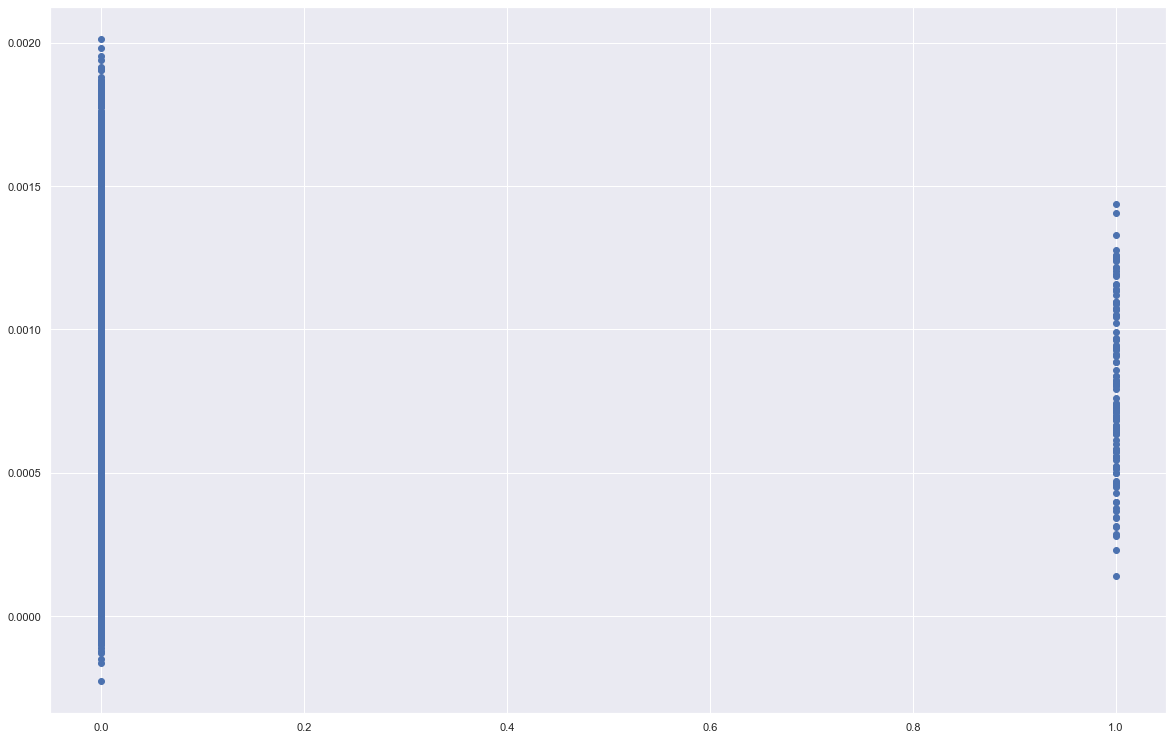

In [311]:
plt.scatter(y_test, predict)

In [312]:
sum(y_test == predict)

0

In [313]:
len(y_test)

141540